<a href="https://colab.research.google.com/github/Sandip2512/LGMVIP---Data-Science/blob/main/task_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [3]:
# code here
df = pd.read_csv('/content/PowerGeneration - PowerGeneration.csv')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0.0,13.0,18.0,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0.0,28.0,7.0,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0.0,40.0,46.0,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0.0,14.0,23.0,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0.0,39.0,17.0,-21.69,0.0


In [5]:
top_power_station = df['Power Station'].value_counts().head(5)

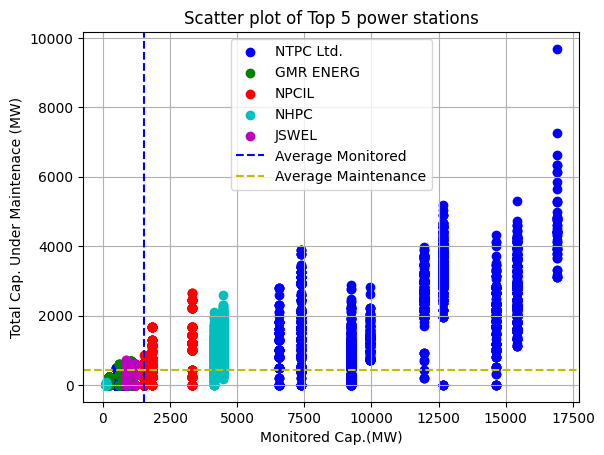

In [87]:
colors = ['b','g','r','c','m']

for i, station in enumerate(top_power_station.index):
  station_data = df[df['Power Station'] == station]
  plt.scatter(station_data['Monitored Cap.(MW)'],station_data['Total Cap. Under Maintenace (MW)'],label=station, color=colors[i])

average_Monitored = df['Monitored Cap.(MW)'].mean()
average_Maintenance = df['Total Cap. Under Maintenace (MW)'].mean()

plt.axvline(x=average_Monitored,color='b',linestyle='dashed',label='Average Monitored')
plt.axhline(y=average_Maintenance,color='y',linestyle='dashed',label='Average Maintenance')



plt.legend()
plt.xlabel('Monitored Cap.(MW)')
plt.ylabel('Total Cap. Under Maintenace (MW)')
plt.title('Scatter plot of Top 5 power stations')
plt.grid()

plt.show()

In [46]:
most_freq = df['Power Station'].value_counts().head().index.tolist()

temp_df = df[df['Power Station'].isin(most_freq)]
encoder = LabelEncoder()
temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])

<ipython-input-46-98e8ac828cce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])


Text(0.5, 1.0, 'TOP 5 most freq Power Stations')

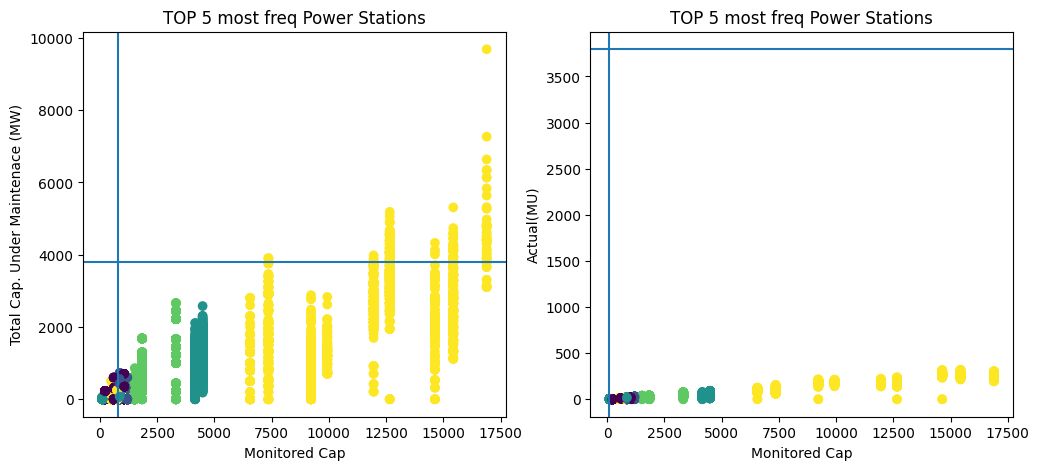

In [85]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(temp_df['Monitored Cap.(MW)'],temp_df['Total Cap. Under Maintenace (MW)'],c=temp_df['Power Station'])
ax[0].axhline(temp_df['Monitored Cap.(MW)'].mean())
ax[0].axvline(temp_df['Total Cap. Under Maintenace (MW)'].mean())
ax[0].set_xlabel('Monitored Cap')
ax[0].set_ylabel('Total Cap. Under Maintenace (MW)')
ax[0].set_title('TOP 5 most freq Power Stations')




ax[1].scatter(temp_df['Monitored Cap.(MW)'],temp_df['Actual(MU)'],c=temp_df['Power Station'])
ax[1].axhline(temp_df['Monitored Cap.(MW)'].mean())
ax[1].axvline(temp_df['Actual(MU)'].mean())
ax[1].set_xlabel('Monitored Cap')
ax[1].set_ylabel('Actual(MU)')
ax[1].set_title('TOP 5 most freq Power Stations')





### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

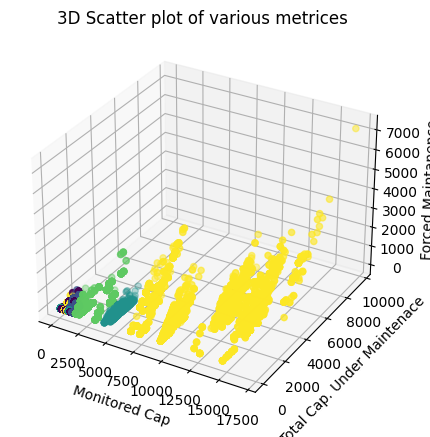

In [108]:
# code here
fig=plt.figure(figsize=(12,5))

ax = plt.subplot(projection = '3d')
ax.scatter3D(temp_df['Monitored Cap.(MW)'],temp_df['Total Cap. Under Maintenace (MW)'],temp_df['Forced Maintanence(MW)'],c=temp_df['Power Station'])
ax.set_xlabel('Monitored Cap')
ax.set_ylabel('Total Cap. Under Maintenace')
ax.set_zlabel('Forced Maintanence')
ax.set_title('3D Scatter plot of various metrices')

plt.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [118]:
# code here
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx,yy = np.meshgrid(x,y)

z = np.abs(xx) - np.abs(yy)

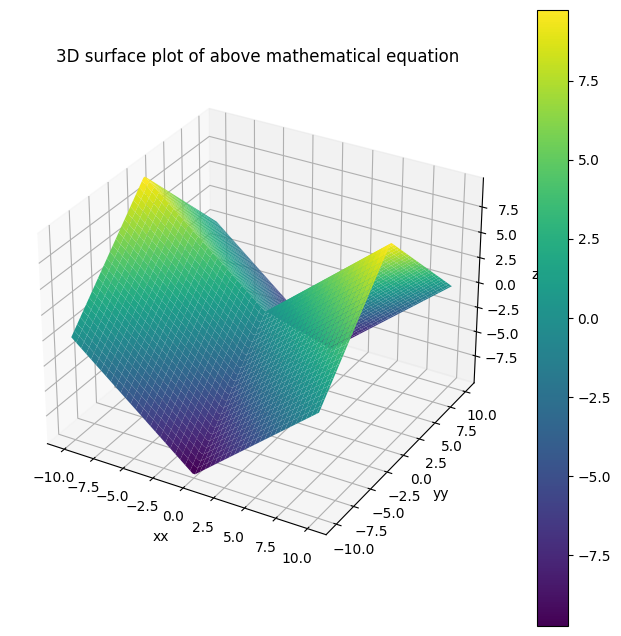

In [153]:
fig = plt.figure(figsize=(8,8))

ax = plt.subplot(projection='3d')

p = ax.plot_surface(xx,yy,z,  cmap='viridis')
fig.colorbar(p)
ax.set_xlabel('xx')
ax.set_ylabel('yy')
ax.set_zlabel('z')
ax.set_title('3D surface plot of above mathematical equation')

plt.show()

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

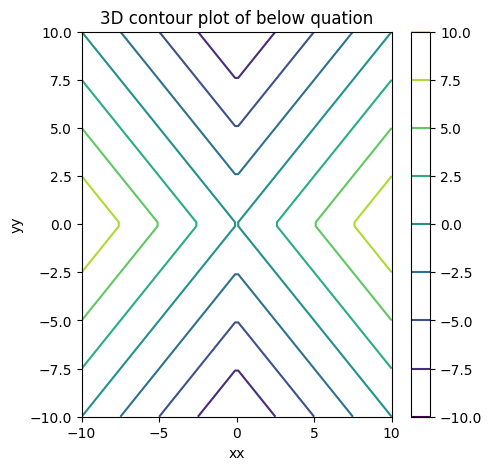

In [138]:
# code here
fig = plt.figure(figsize=(5,5))

ax = plt.subplot()
p =ax.contour(xx,yy,z)
fig.colorbar(p)
ax.set_xlabel('xx')
ax.set_ylabel('yy')
ax.set_title('3D contour plot of below quation')

plt.show()


### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

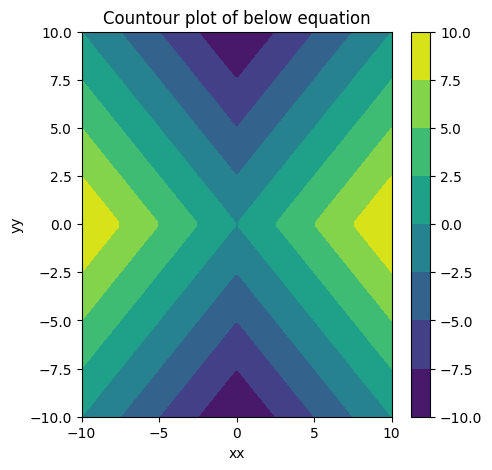

In [152]:
# code here
fig = plt.figure(figsize=(5,5))

ax = plt.subplot()
p = ax.contourf(xx,yy,z)
fig.colorbar(p)

ax.set_xlabel('xx')
ax.set_ylabel('yy')
ax.set_title('Countour plot of below equation')

plt.show()

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [ ]:
# code here

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

In [ ]:
# code here

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [ ]:
# code here

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [ ]:
# code here

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

In [ ]:
# code here